In [133]:
# Librerias generales
import pandas as pd
import numpy as np
import sqlite3 as sql ### para conectarse a BD
from sklearn.impute import SimpleImputer
import plotly.express as px

# Librerias e visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df_cronicos = pd.read_excel('RETO_df_cronicos.xlsx')
df_cronicos.head(2)

,YEAR,MES,Fecha diligenciamiento,Hora,AtenciÃ³n,Ingreso,Tipo,NRODOC,Peso,Talla,IMC,ClasificaciÃ³n IMC,SaturaciÃ³n de OxÃ­geno (%),PerÃ­metro Muslo,PerÃ­metro Cintura,Pliegue Triceps,Pliegue Abdomen,Pliegue Muslo,Sumatoria Pliegues,PresiÃ³n Arterial SistÃ³lica,PresiÃ³n Arterial DiastÃ³lica,Frecuencia CardÃ­aca en reposo,Auto-calificacion Nivel de Ejercicio,Constantes,METS -Ãndice MetabÃ³lico,VO2 - MÃ¡xima Cantidad de OxÃ­geno,Ãndice de Fragilidad Groningen,CalificaciÃ³n (Ãndice de Fragilidad),Tiempo en Segundos (Apoyo Monopodal),CalificaciÃ³n (Apoyo Monopodal),Tiempo en Segundos (Recorrer 5 metros),Velocidad (m/s),CalificaciÃ³n Velocidad,Test Findrisc,Ãndice Tobillo/Brazo,Observaciones,PresiÃ³n arterial registro medico,Diabetes Mellitus,Tipo diabetes mellitus,Es insulinorequiriente,Tiempo con el diagnÃ³stico,Glicemia,Fecha glicemia,Hemoglobina Glicada,Fecha hemoglobina glicosilada,Control Diabetes,Tiene riesgo de tener Diabetes Mellitus,Tiene HTA,Control HTA,Tiene riesgo de tener HTA,Tiempo con el diagnÃ³stico1,Tiene EPOC,Espirometria,VEF1/CVF,VEF1/VFC Posbroncodilatador,Gravedad,DiagnÃ³stico EPOC,Disnea MMRC,ClasificaciÃ³n,CAT,NÃºmero de exacerbaciones Ãºltimo aÃ±o (Que hayan necesitado hospitalizado),ClasificaciÃ³n GOLD,ClasificaciÃ³n1,ClasificaciÃ³n BODEX,OxÃ­geno dependiente,Tiene gases arteriales,Resultado,EPOC (ClasificaciÃ³n BODEX),Enfermedad Coronaria (En el Ãºltimo aÃ±o),Insuficiencia CardÃ­aca,ValvulopatÃ­a,Arritmia o paciente con dispositivo,Sufre de alguna enfermedad cardiovascular,Â¿CuÃ¡l?,Tabaquismo,Cuantos cigarrillos dÃ­a,AÃ±os de Consumo,Indice paquete/aÃ±o,Lipoproteina,Fecha LDL,HDL,Fecha HDL,Colesterol total,Fecha colesterol total,Trigliceridos,Fecha trigliceridos,ClasificaciÃ³n de Framinghan,Creatinina 1 consulta,Fecha creatinina1,Tasa de FiltraciÃ³n Glomerular TFG,Estadio de la Enfermedad Renal,Microalbuminuria,Fecha microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Otras Morbilidades,Clase Funcional,Creatinina 2 consulta,Fecha creatinina2,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,ClasificaciÃ³n Cambio de TFG,Ãšltima mamografÃ­a,Ãšltima citologÃ­a,Ãšltima cita odontolÃ³gica,Ãšltima cita con OptometrÃ­a / OftallmologÃ­a,Ãšltimo PSA,Basciloscopia,Fecha basciloscopia,Ãšltima vacuna de influenza,Fecha Vacuna Neumococo,Fecha vacuna neumococo veintitrÃ©s valentes,Ãšlcera de pie diabÃ©tico,RemisiÃ³n,DiagnÃ³stico Principal,AnÃ¡lisis y conducta a seguir,Tiene prÃ³ximo control,Fecha PrÃ³ximo Control,Tipo control,Requiere cita de morbilidad,Fecha cita morbilidad,Ambito segÃºn el mÃ©dico,Diagnostico1,NombreDiagnostico1,Diagnostico2,NombreDiagnostico2,Diagnostico3,NombreDiagnostico3,Diagnostico4,NombreDiagnostico4,Diagnostico5,NombreDiagnostico5,Diagnostico6,NombreDiagnostico6,Diagnostico7,NombreDiagnostico7,Diagnostico8,NombreDiagnostico8,Diagnostico9,NombreDiagnostico9,Diagnostico10,NombreDiagnostico10,Diagnostico11,NombreDiagnostico11,Diagnostico12,NombreDiagnostico12,Diagnostico13,NombreDiagnostico13,Diagnostico14,NombreDiagnostico14,Diagnostico15,NombreDiagnostico15,Diagnostico16,NombreDiagnostico16,Diagnostico17,NombreDiagnostico17,Diagnostico18,NombreDiagnostico18,Diagnostico19,NombreDiagnostico19,Diagnostico20,NombreDiagnostico20,Diagnostico21,NombreDiagnostico21,Diagnostico22,NombreDiagnostico22,Diagnostico23,NombreDiagnostico23,Diagnostico24,NombreDiagnostico24,Diagnostico25,NombreDiagnostico25,Diagnostico26,NombreDiagnostico26,Diagnostico26.1,NombreDiagnostico26.1,Diagnostico27,NombreDiagnostico27,Diagnostico28,NombreDiagnostico28,Diagnostico29,NombreDiagnostico29,Diagnostico30,NombreDiagnostico30,Diagnostico31,NombreDiagnostico31,Diagnostico32,NombreDiagnostico32,Diagnostico33,NombreDiagnostico33,Diagnostico34,NombreDiagnostico34,Diagnostico35,NombreDiagnostico35,Diagnostico36,NombreDiagnostico36,Diagnostico37,NombreDiagnostico37,Diagnostico38,NombreDiagnostico38,Diagnostico39,NombreDiagnostico39,Diagnostico40,NombreDiagnostico40,Diagnostico41,NombreDiagnosti

In [143]:
df_cronicos = df_cronicos.iloc[:,:122]
df_cronicos.head(2)

,YEAR,MES,Fecha diligenciamiento,Hora,AtenciÃ³n,Ingreso,Tipo,NRODOC,Peso,Talla,IMC,ClasificaciÃ³n IMC,SaturaciÃ³n de OxÃ­geno (%),PerÃ­metro Muslo,PerÃ­metro Cintura,Pliegue Triceps,Pliegue Abdomen,Pliegue Muslo,Sumatoria Pliegues,PresiÃ³n Arterial SistÃ³lica,PresiÃ³n Arterial DiastÃ³lica,Frecuencia CardÃ­aca en reposo,Auto-calificacion Nivel de Ejercicio,Constantes,METS -Ãndice MetabÃ³lico,VO2 - MÃ¡xima Cantidad de OxÃ­geno,Ãndice de Fragilidad Groningen,CalificaciÃ³n (Ãndice de Fragilidad),Tiempo en Segundos (Apoyo Monopodal),CalificaciÃ³n (Apoyo Monopodal),Tiempo en Segundos (Recorrer 5 metros),Velocidad (m/s),CalificaciÃ³n Velocidad,Test Findrisc,Ãndice Tobillo/Brazo,Observaciones,PresiÃ³n arterial registro medico,Diabetes Mellitus,Tipo diabetes mellitus,Es insulinorequiriente,Tiempo con el diagnÃ³stico,Glicemia,Fecha glicemia,Hemoglobina Glicada,Fecha hemoglobina glicosilada,Control Diabetes,Tiene riesgo de tener Diabetes Mellitus,Tiene HTA,Control HTA,Tiene riesgo de tener HTA,Tiempo con el diagnÃ³stico1,Tiene EPOC,Espirometria,VEF1/CVF,VEF1/VFC Posbroncodilatador,Gravedad,DiagnÃ³stico EPOC,Disnea MMRC,ClasificaciÃ³n,CAT,NÃºmero de exacerbaciones Ãºltimo aÃ±o (Que hayan necesitado hospitalizado),ClasificaciÃ³n GOLD,ClasificaciÃ³n1,ClasificaciÃ³n BODEX,OxÃ­geno dependiente,Tiene gases arteriales,Resultado,EPOC (ClasificaciÃ³n BODEX),Enfermedad Coronaria (En el Ãºltimo aÃ±o),Insuficiencia CardÃ­aca,ValvulopatÃ­a,Arritmia o paciente con dispositivo,Sufre de alguna enfermedad cardiovascular,Â¿CuÃ¡l?,Tabaquismo,Cuantos cigarrillos dÃ­a,AÃ±os de Consumo,Indice paquete/aÃ±o,Lipoproteina,Fecha LDL,HDL,Fecha HDL,Colesterol total,Fecha colesterol total,Trigliceridos,Fecha trigliceridos,ClasificaciÃ³n de Framinghan,Creatinina 1 consulta,Fecha creatinina1,Tasa de FiltraciÃ³n Glomerular TFG,Estadio de la Enfermedad Renal,Microalbuminuria,Fecha microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Otras Morbilidades,Clase Funcional,Creatinina 2 consulta,Fecha creatinina2,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,ClasificaciÃ³n Cambio de TFG,Ãšltima mamografÃ­a,Ãšltima citologÃ­a,Ãšltima cita odontolÃ³gica,Ãšltima cita con OptometrÃ­a / OftallmologÃ­a,Ãšltimo PSA,Basciloscopia,Fecha basciloscopia,Ãšltima vacuna de influenza,Fecha Vacuna Neumococo,Fecha vacuna neumococo veintitrÃ©s valentes,Ãšlcera de pie diabÃ©tico,RemisiÃ³n,DiagnÃ³stico Principal,AnÃ¡lisis y conducta a seguir,Tiene prÃ³ximo control,Fecha PrÃ³ximo Control,Tipo control,Requiere cita de morbilidad,Fecha cita morbilidad,Ambito segÃºn el mÃ©dico
0,2017,OCTUBRE,2017-10-02,9:00:20 a. m.,3912499,2629714,CC,311144,69.0,155.0,28.72,Sobrepeso,91.0,51,109.0,10.0,25.0,5.0,40.0,140,77,66,3,1.06,6.3376,22.1816,3.0,FrÃ¡gil,15,Aceptable,5,1.00,Aceptable,Alta Probabilidad de Diabetes,NaN,NaN,NaN,Si,ND,ND,ND,0.0,ND,8.15,ND,No controlada,No aplica,Si,Controlada,No aplica,ND,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leve,No aplica,No aplica,No,No,No,NaN,Si,ND,NaN,NaN,60.68,ND,53.95,ND,128.0,ND,67.33,ND,Bajo riesgo,0.68,ND,63.49,Estadio 2,56.55,ND,5.05,NaN,Clase funcional 2B,0.0,ND,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),ESTADIO RENAL 2 A3?RCV a 10 aÃ±os MODERADO **C...,ND,2018-01-02,Sin dato,ND,ND,Ambulatorio
1,2017,OCTUBRE,2017-10-02,9:04:33 a. m.,3942247,2629726,CC,308418,62.0,155.0,25.81,Sobrepeso,94.0,60,89.0,25.0,35.0,20.0,80.0,181,143,90,2,0.32,4.1023,14.3580,6.0,FrÃ¡gil,1,Malo - Fragil,7,0.71,Deficiente,Alta Probabilidad de Diabetes,NaN,NaN,NaN,No,ND,ND,ND,98.0,ND,0.00,ND,No aplica,NaN,Si,No controlada,No aplica,ND,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderada,No aplica,No aplica,No,No,No,NaN,No,ND,NaN,NaN,92.00,ND,45.00,ND,157.0,ND,103.00,ND,Alto riesgo,0.85,ND,58.56,Estadio 3A,0.00,ND,4.65,NaN,Clase funcional 2A,0.0,ND,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMAR

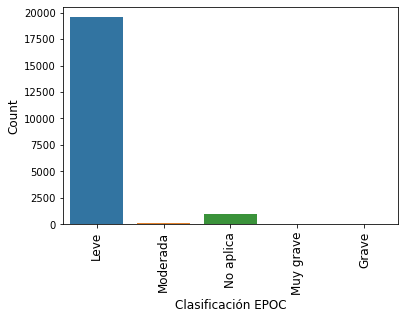

In [144]:
ax = sns.countplot(x='EPOC (ClasificaciÃ³n BODEX)',   data= df_cronicos)
plt.xlabel('Clasificación EPOC', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

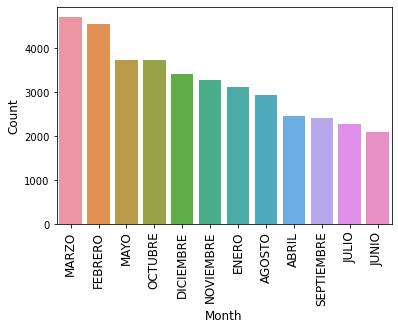

In [146]:
ax = sns.barplot(x=df_cronicos['MES'].value_counts().index,   y=df_cronicos['MES'].value_counts())
plt.xlabel('Month', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

In [164]:
df_diagnosticos = df_cronicos.groupby(['DiagnÃ³stico Principal']).agg(encounters = ('NRODOC', 'count')).reset_index().sort_values(['encounters'], ascending = False)
df_diagnosticos10 = df_diagnosticos.head(10)

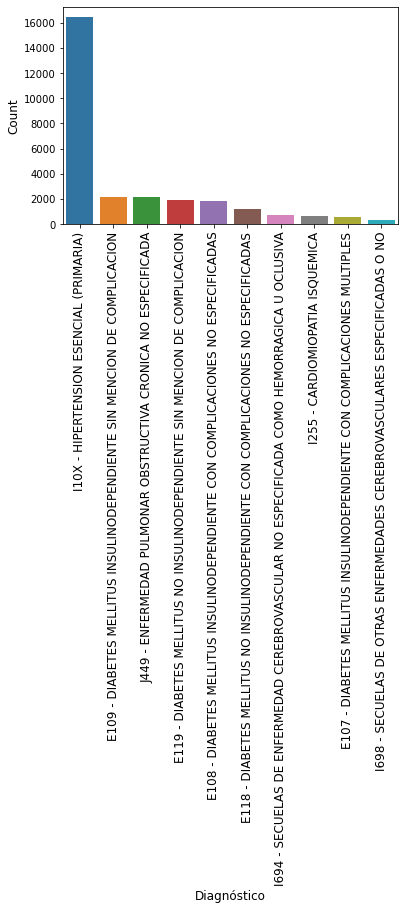

In [163]:
ax = sns.barplot(x=df_diagnosticos10['DiagnÃ³stico Principal'].value_counts().index,   y=df_diagnosticos10['encounters'])
plt.xlabel('Diagnóstico', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

In [201]:
df_usuarios = pd.read_excel('RETO_df_usuarios.xlsx')
df_usuarios.head(2)

,MES,YEAR,NRODOC,SEXO,FECHA NACIMIENTO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,FECHA PRIMERA CLASE FUNCIONAL,PRIMERA CLASE FUNCIONAL,FECHA ÃšLTIMA CLASE FUNCIONAL,ÃšLTIMA CLASE FUNCIONAL,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,1938-09-09,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
1,ABRIL,2017,306222,F,1974-07-03,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN


In [ ]:
##Se verifican las categorías de la columna sexo
df_usuarios['SEXO'].value_counts()

In [208]:
df_usuarios[df_usuarios['NRODOC'] == 309782]
df_usuarios[df_usuarios['NRODOC'] == 306889]
df_usuarios[df_usuarios['NRODOC'] == 306775]
df_usuarios[df_usuarios['NRODOC'] == 309715]
df_usuarios[df_usuarios['NRODOC'] == 307090]
df_usuarios[df_usuarios['NRODOC'] == 310309]
df_usuarios[df_usuarios['NRODOC'] == 308156]
df_usuarios[df_usuarios['NRODOC'] == 308609]
df_usuarios[df_usuarios['NRODOC'] == 309364]
df_usuarios[df_usuarios['NRODOC'] == 309492]
df_usuarios[df_usuarios['NRODOC'] == 307487]
df_usuarios[df_usuarios['NRODOC'] == 309245]
df_usuarios[df_usuarios['NRODOC'] == 308029]
#df_usuarios[df_usuarios['NRODOC'] == 311233]



,MES,YEAR,NRODOC,SEXO,FECHA NACIMIENTO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,FECHA PRIMERA CLASE FUNCIONAL,PRIMERA CLASE FUNCIONAL,FECHA ÃšLTIMA CLASE FUNCIONAL,ÃšLTIMA CLASE FUNCIONAL,CICLO_VITAL,QUINQUENIO
1808,ABRIL,2017,308029,F,1946-01-13,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
9948,MAYO,2017,308029,CL 40 C SUR 29 C 31LA FLORIDA,1946-01-13,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
10603,JUNIO,2017,308029,F,1946-01-13,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
59890,ABRIL,2017,308029,F,1946-01-13,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN


In [217]:
df_usuarios = df_usuarios.drop(df_usuarios[df_usuarios['NRODOC'] == 311233].index)


In [218]:
df_usuarios['SEXO']=df_usuarios['SEXO'].replace({'CARRERA 51 B 1 33':'M','CL 48  95 55':'F','CR 49 46 14':'F','CRR 47 N  41 32':'F','CALLE 80 A 71 A 18':'F','CL 94  74B  16':'F','CALLE 77E   8830':'F','KR 55A 47 16  BR SANTA ANA':'F','KR 92 NRO 46 97':'F','CL 55 80 54':'M','CALLE 38 SUR N  29 A 54 PISO 2':'M','CR 75A   88A   27 BRR ROBLEDO KENEDY':'M','CL  40 C  SUR   29 C  31LA FLORIDA':'F'})

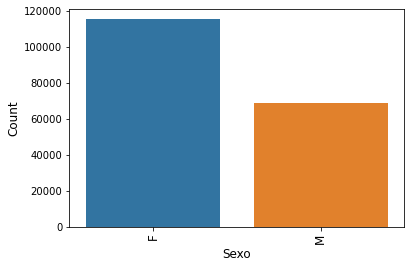

In [220]:
ax = sns.countplot(x='SEXO',   data= df_usuarios)
plt.xlabel('Sexo', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

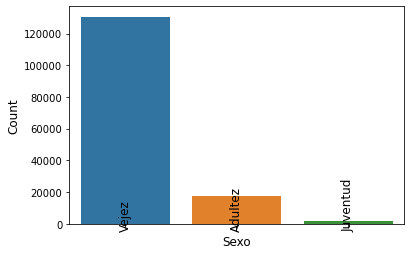

In [236]:
ax = sns.countplot(x='CICLO_VITAL',   data= df_usuarios)
plt.xlabel('Sexo', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

In [130]:
df_egresos = pd.read_excel('RETO_df_egresos.xlsx')
df_egresos.head(2)

,YEAR,MES,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN AFILIACION,EPS VALIDADA,MODALIDAD CONTRATO,FUENTE FINANCIACION1,FUENTE FINANCIACION2,SERVICIO ADMITE,BLOQUE ANTERIOR,PISO ANTERIOR,SERVICIO ANTERIOR,NRO CAMA ANTERIOR,VIA INGRESO,BLOQUE,UNIDAD ESTRATEGICA,PISO,NRO CAMA,SERVICIO EGRESO,TIPO EGRESO,FECHA INGRESO CLINICA,FECHA INGRESO SERVICIO,FECHA POSIBLE ALTA,FECHA ALTA MEDICA,FECHA RECAUDO,FECHA CAMILLERO,FECHA ENFERMERIA,FECHA FACTURACION AUDIFARMA,FECHA FARMACIA,FECHA SALIDA,FECHA ASEO,DEMORA ASIGNACION CAMA,DEMORA APLICACION MEDICAMENTO,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,ALTA MEDICA,POSIBLE ALTA,DXPRINCIPAL EGRESO COD,DXPRINCIPAL EGRESO,DX RELACIONADO1 COD,DX RELACIONADO1,DX RELACIONADO2 COD,DX RELACIONADO2,DX RELACIONADO3 COD,DX RELACIONADO3,TIPO DIAGNOSTICO PRINCIPAL,PERTINENCIA DIAGNOSTICA,DX PRINCIPAL EGRESO CATEGORIA COD,DX PRINCIPAL EGRESO CATEGORIA,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,CAUSA BASICA MUERTE COD,CAUSA BASICA MUERTE,CAUSA BASICA CATEGORIA COD,CAUSA BASICA CATEGORIA,CAUSA BASICA CAPITULO COD,CAUSA BASICA CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,-1,Sin Informacion,CC,308185,1937-07-18,Sin informaciÃ³n,NaN,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin informaciÃ³n,NaT,NaT,NaT,2017-05-17 09:03:57.637,NaT,NaT,NaT,NaT,NaT,2017-05-17 10:55:02,NaT,00:00:00,00:00:00,0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J984,OTROS TRASTORNOS DEL PULMON,J432,ENFISEMA CENTROLOBULAR,J981,COLAPSO PULMONAR,Sin Informacion,NaN,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
1,2017,DICIEMBRE,3720631,2018136,-1,Sin Informacion,CC,308185,1937-07-18,Sin informaciÃ³n,NaN,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin informaciÃ³n,NaT,NaT,NaT,2017-12-07 09:35:27.147,NaT,NaT,NaT,NaT,NaT,2017-12-07 11:06:49,NaT,00:00:00,00:00:00,0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J960,INSUFICIENCIA RESPIRATORIA AGUDA,I110,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIE...,I270,HIPERTENSION PULMONAR PRIMARIA,Sin Informacion,NaN,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna


In [223]:
df_egresos['SERVICIO ADMITE'].value_counts()

Urgencias Generales SÃ³tano         4010
HospitalizaciÃ³n                    1926
Urgencias Generales Piso 1           247
CirugÃ­a                             114
Urgencias Maternas                    36
Ambulatoria Personal                  24
Sin informacion en Base de datos      14
Ambulatoria Programada                 3
AtenciÃ³n Prioritaria                  1
AtenciÃ³n Domiciliaria                 1
Name: SERVICIO ADMITE, dtype: int64

In [228]:
fig  = px.histogram(df_egresos, x= 'SERVICIO ADMITE', title= 'Hist frecuencia de tipo de servicio por usuario')
fig.show()

In [229]:
df_egresos['UNIDAD ESTRATEGICA'].value_counts()

Hospitalizacion Adultos          5227
Urgencias                         978
UCI Adultos                        99
CUIDADOS ESPECIALES                65
Apoyo Terapeutico                   3
Hospitalizacion Domiciliaria        2
Apoyo Diagnostico Ambulatorio       2
Name: UNIDAD ESTRATEGICA, dtype: int64

In [230]:
fig  = px.histogram(df_egresos, x= 'UNIDAD ESTRATEGICA', title= 'Hist frecuencia de unidad estrategica por usuario')
fig.show()

In [231]:
df_egresos['REGIMEN AFILIACION'].value_counts()

Contributivo          4088
Sin informaciÃ³n      2272
Subsidiado              10
Soat                     3
Particular               2
Medicina prepagada       1
Name: REGIMEN AFILIACION, dtype: int64

In [232]:
fig = px.pie(df_egresos , values = 'NRODOC', names = 'REGIMEN AFILIACION', title = '<b>% Accidentes segun el tipo de accidente<b>')
# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    legend_title = 'Clase de Accidente',
    title_x = 0.5)

fig.show()

In [ ]:
 #Se muestra el tamaño de cada base cargada
print(df_cronicos.shape)
print(df_usuarios.shape)
print(df_egresos.shape)

(38717, 290)
(183911, 16)
(6376, 66)


In [ ]:
df_cronicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38717 entries, 0 to 38716
Columns: 290 entries, YEAR to NombreDiagnostico83
dtypes: datetime64[ns](3), float64(38), int64(11), object(238)
memory usage: 85.7+ MB


In [ ]:
df_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183911 entries, 0 to 183910
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   MES                            183911 non-null  object        
 1   YEAR                           183911 non-null  int64         
 2   NRODOC                         183911 non-null  int64         
 3   SEXO                           183901 non-null  object        
 4   FECHA NACIMIENTO               111831 non-null  datetime64[ns]
 5   EDAD                           149755 non-null  float64       
 6   DEPARTAMENTO                   82284 non-null   object        
 7   MUNICIPIO                      81397 non-null   object        
 8   BARRIO                         115344 non-null  object        
 9   FECHA INICIO AL PGP            125658 non-null  datetime64[ns]
 10  FECHA PRIMERA CLASE FUNCIONAL  87961 non-null   object        
 11  

In [ ]:
df_egresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   YEAR                               6376 non-null   int64         
 1   MES                                6376 non-null   object        
 2   NRO ATENCION                       6376 non-null   int64         
 3   NRO INGRESO                        6376 non-null   int64         
 4   SERVICIO HABILITADO COD            6376 non-null   int64         
 5   SERVICIO HABILITADO                6376 non-null   object        
 6   TIPO IDENTIFICACION                6376 non-null   object        
 7   NRODOC                             6376 non-null   int64         
 8   FECHA NACIMIENTO                   6376 non-null   datetime64[ns]
 9   REGIMEN AFILIACION                 6376 non-null   object        
 10  EPS VALIDADA                       4

In [47]:
df_cronicos.isnull().sum()

YEAR                          0
MES                           0
Fecha diligenciamiento        0
Hora                          0
AtenciÃ³n                     0
                          ...  
NombreDiagnostico81       38702
Diagnostico82             38704
NombreDiagnostico82       38704
Diagnostico83             38704
NombreDiagnostico83       38704
Length: 290, dtype: int64

In [72]:
##Eliminar las columnas que contienen más de un umbral de valores nulos.
##El umbral se definió en 0,2 porque consideramos que las columnas que tengan mas del 80 por ciento de sus datos nulos no aportan al desarrollo del modelo
def eliminar_columnas_con_nulos(df, umbral=0.2):
    
    # Calcula la proporción de valores nulos en cada columna
    proporciones_nulos = df.isnull().mean()
    
    # Filtra las columnas que tienen un porcentaje de valores nulos mayor que el umbral
    columnas_a_eliminar = proporciones_nulos[proporciones_nulos > umbral].index
    
    # Elimina las columnas con valores nulos
    df_sin_nulos = df.drop(columns=columnas_a_eliminar)
    
    return df_sin_nulos


In [136]:
##Eliminar las columnas de df_cronicos que contengan mas del 80% de nulos
cronicos = eliminar_columnas_con_nulos(df_cronicos)
cronicos.head(3)

,YEAR,MES,Fecha diligenciamiento,Hora,AtenciÃ³n,Ingreso,Tipo,NRODOC,Peso,Talla,IMC,ClasificaciÃ³n IMC,SaturaciÃ³n de OxÃ­geno (%),PerÃ­metro Muslo,PerÃ­metro Cintura,Pliegue Triceps,Pliegue Abdomen,Pliegue Muslo,Sumatoria Pliegues,PresiÃ³n Arterial SistÃ³lica,PresiÃ³n Arterial DiastÃ³lica,Frecuencia CardÃ­aca en reposo,Auto-calificacion Nivel de Ejercicio,Constantes,METS -Ãndice MetabÃ³lico,VO2 - MÃ¡xima Cantidad de OxÃ­geno,Ãndice de Fragilidad Groningen,CalificaciÃ³n (Ãndice de Fragilidad),Tiempo en Segundos (Apoyo Monopodal),CalificaciÃ³n (Apoyo Monopodal),Tiempo en Segundos (Recorrer 5 metros),Velocidad (m/s),CalificaciÃ³n Velocidad,Diabetes Mellitus,Glicemia,Fecha glicemia,Hemoglobina Glicada,Fecha hemoglobina glicosilada,Control Diabetes,Tiene HTA,Tiempo con el diagnÃ³stico1,Tiene EPOC,Enfermedad Coronaria (En el Ãºltimo aÃ±o),Insuficiencia CardÃ­aca,ValvulopatÃ­a,Arritmia o paciente con dispositivo,Sufre de alguna enfermedad cardiovascular,Tabaquismo,Cuantos cigarrillos dÃ­a,Lipoproteina,HDL,Fecha HDL,Colesterol total,Fecha colesterol total,Trigliceridos,Fecha trigliceridos,Creatinina 1 consulta,Fecha creatinina1,Tasa de FiltraciÃ³n Glomerular TFG,Estadio de la Enfermedad Renal,Microalbuminuria,Fecha microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Clase Funcional,Creatinina 2 consulta,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,Ãšlcera de pie diabÃ©tico,RemisiÃ³n,DiagnÃ³stico Principal,AnÃ¡lisis y conducta a seguir
0,2017,OCTUBRE,2017-10-02,9:00:20 a. m.,3912499,2629714,CC,311144,69.0,155.0,28.72,Sobrepeso,91.0,51,109.0,10.0,25.0,5.0,40.0,140,77,66,3,1.06,6.3376,22.1816,3.0,FrÃ¡gil,15,Aceptable,5,1.00,Aceptable,Si,0.0,ND,8.15,ND,No controlada,Si,ND,No,No aplica,No aplica,No,No,No,Si,ND,60.68,53.95,ND,128.0,ND,67.33,ND,0.68,ND,63.49,Estadio 2,56.55,ND,5.05,Clase funcional 2B,0.0,0.0,0.0,0.0,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),ESTADIO RENAL 2 A3?RCV a 10 aÃ±os MODERADO **C...
1,2017,OCTUBRE,2017-10-02,9:04:33 a. m.,3942247,2629726,CC,308418,62.0,155.0,25.81,Sobrepeso,94.0,60,89.0,25.0,35.0,20.0,80.0,181,143,90,2,0.32,4.1023,14.3580,6.0,FrÃ¡gil,1,Malo - Fragil,7,0.71,Deficiente,No,98.0,ND,0.00,ND,No aplica,Si,ND,Si,No aplica,No aplica,No,No,No,No,ND,92.00,45.00,ND,157.0,ND,103.00,ND,0.85,ND,58.56,Estadio 3A,0.00,ND,4.65,Clase funcional 2A,0.0,0.0,0.0,0.0,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),"Paciente 72 aÃ±os, Antecedente de. 1. HTA 2. E..."
2,2017,OCTUBRE,2017-10-02,9:11:43 a. m.,3898560,2629751,CC,308573,89.0,163.0,33.50,Obesidad Grasa,96.0,65,113.0,10.0,30.0,5.0,45.0,154,102,75,2,0.32,7.0150,24.5525,5.0,FrÃ¡gil,20,Aceptable,5,1.00,Aceptable,No,107.0,ND,0.00,ND,No aplica,Si,ND,No,No aplica,No aplica,No,No,Si,Si,ND,43.00,30.00,ND,115.0,ND,204.00,ND,1.32,ND,62.09,Estadio 2,12.00,ND,5.41,Clase funcional 2B,0.0,0.0,0.0,0.0,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),paciente con RCV alto por antecednete de enf. ...


In [88]:
nuloscronicos=cronicos.isnull().sum().sort_values(ascending=False)
nuloscronicos.head(20)

Tiempo con el diagnÃ³stico1       7003
Fecha microalbuminuria            4819
Fecha hemoglobina glicosilada     3631
Ãšlcera de pie diabÃ©tico         3505
Estadio de la Enfermedad Renal    3248
Fecha glicemia                    2454
Fecha trigliceridos               2323
Fecha colesterol total            2274
Fecha HDL                         2249
Fecha creatinina1                 1786
DiagnÃ³stico Principal            1350
AnÃ¡lisis y conducta a seguir     1097
Microalbuminuria                  1053
Colesterol total                  1053
Clase Funcional                   1053
Tabaquismo                        1053
Cambio de TFG                     1053
HDL                               1053
Creatinina 2 consulta             1053
Lipoproteina                      1053
dtype: int64

In [106]:
cronicos.dtypes.head(20)

YEAR                                     int64
MES                                     object
Fecha diligenciamiento          datetime64[ns]
Hora                                    object
AtenciÃ³n                                int64
Ingreso                                  int64
Tipo                                    object
NRODOC                                   int64
Peso                                   float64
Talla                                  float64
IMC                                    float64
ClasificaciÃ³n IMC                      object
SaturaciÃ³n de OxÃ­geno (%)            float64
PerÃ­metro Muslo                         int64
PerÃ­metro Cintura                     float64
Pliegue Triceps                        float64
Pliegue Abdomen                        float64
Pliegue Muslo                          float64
Sumatoria Pliegues                     float64
PresiÃ³n Arterial SistÃ³lica             int64
dtype: object

In [ ]:
#Definir imputer para variables numéricas
imp_num = SimpleImputer(strategy='most_frequent')
#Ajustar imputer y transformar las variables con valores null
cronicos['EnvironmentSatisfaction']= imp_num.fit_transform(cronicos['EnvironmentSatisfaction'].values.reshape(-1,1))

In [85]:
##Mostrar todas las columnas 
pd.options.display.max_columns = None
cronicos.head(2)

,YEAR,MES,Fecha diligenciamiento,Hora,AtenciÃ³n,Ingreso,Tipo,NRODOC,Peso,Talla,IMC,ClasificaciÃ³n IMC,SaturaciÃ³n de OxÃ­geno (%),PerÃ­metro Muslo,PerÃ­metro Cintura,Pliegue Triceps,Pliegue Abdomen,Pliegue Muslo,Sumatoria Pliegues,PresiÃ³n Arterial SistÃ³lica,PresiÃ³n Arterial DiastÃ³lica,Frecuencia CardÃ­aca en reposo,Auto-calificacion Nivel de Ejercicio,Constantes,METS -Ãndice MetabÃ³lico,VO2 - MÃ¡xima Cantidad de OxÃ­geno,Ãndice de Fragilidad Groningen,CalificaciÃ³n (Ãndice de Fragilidad),Tiempo en Segundos (Apoyo Monopodal),CalificaciÃ³n (Apoyo Monopodal),Tiempo en Segundos (Recorrer 5 metros),Velocidad (m/s),CalificaciÃ³n Velocidad,Diabetes Mellitus,Glicemia,Fecha glicemia,Hemoglobina Glicada,Fecha hemoglobina glicosilada,Control Diabetes,Tiene HTA,Tiempo con el diagnÃ³stico1,Tiene EPOC,Enfermedad Coronaria (En el Ãºltimo aÃ±o),Insuficiencia CardÃ­aca,ValvulopatÃ­a,Arritmia o paciente con dispositivo,Sufre de alguna enfermedad cardiovascular,Tabaquismo,Cuantos cigarrillos dÃ­a,Lipoproteina,HDL,Fecha HDL,Colesterol total,Fecha colesterol total,Trigliceridos,Fecha trigliceridos,Creatinina 1 consulta,Fecha creatinina1,Tasa de FiltraciÃ³n Glomerular TFG,Estadio de la Enfermedad Renal,Microalbuminuria,Fecha microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Clase Funcional,Creatinina 2 consulta,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,Ãšlcera de pie diabÃ©tico,RemisiÃ³n,DiagnÃ³stico Principal,AnÃ¡lisis y conducta a seguir
0,2017,OCTUBRE,2017-10-02,9:00:20 a. m.,3912499,2629714,CC,311144,69.0,155.0,28.72,Sobrepeso,91.0,51,109.0,10.0,25.0,5.0,40.0,140,77,66,3,1.06,6.3376,22.1816,3.0,FrÃ¡gil,15,Aceptable,5,1.00,Aceptable,Si,0.0,ND,8.15,ND,No controlada,Si,ND,No,No aplica,No aplica,No,No,No,Si,ND,60.68,53.95,ND,128.0,ND,67.33,ND,0.68,ND,63.49,Estadio 2,56.55,ND,5.05,Clase funcional 2B,0.0,0.0,0.0,0.0,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),ESTADIO RENAL 2 A3?RCV a 10 aÃ±os MODERADO **C...
1,2017,OCTUBRE,2017-10-02,9:04:33 a. m.,3942247,2629726,CC,308418,62.0,155.0,25.81,Sobrepeso,94.0,60,89.0,25.0,35.0,20.0,80.0,181,143,90,2,0.32,4.1023,14.3580,6.0,FrÃ¡gil,1,Malo - Fragil,7,0.71,Deficiente,No,98.0,ND,0.00,ND,No aplica,Si,ND,Si,No aplica,No aplica,No,No,No,No,ND,92.00,45.00,ND,157.0,ND,103.00,ND,0.85,ND,58.56,Estadio 3A,0.00,ND,4.65,Clase funcional 2A,0.0,0.0,0.0,0.0,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),"Paciente 72 aÃ±os, Antecedente de. 1. HTA 2. E..."


In [107]:
##Eliminar las columnas de df_usuarios que contengan mas del 80% de nulos
usuarios = eliminar_columnas_con_nulos(df_usuarios)
usuarios.head()

,MES,YEAR,NRODOC,SEXO,EDAD,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,NaN,NaN,NaN
1,ABRIL,2017,306222,F,NaN,NaN,NaN
2,ABRIL,2017,306223,F,NaN,NaN,NaN
3,ABRIL,2017,306224,F,NaN,NaN,NaN
4,ABRIL,2017,306225,M,NaN,NaN,NaN


In [109]:
nulosusuarios=usuarios.isnull().sum().sort_values(ascending=False)
nulosusuarios

EDAD           34156
CICLO_VITAL    34156
QUINQUENIO     34156
SEXO              10
MES                0
YEAR               0
NRODOC             0
dtype: int64

In [110]:
#Eliminar las columnas CICLO_VITAL y QUINQUENIO ya que aportan información sobre la edad separada por categorías
usuarios2 = usuarios.drop(['CICLO_VITAL','QUINQUENIO'], axis = 1)

In [111]:
usuarios2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183911 entries, 0 to 183910
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   MES     183911 non-null  object 
 1   YEAR    183911 non-null  int64  
 2   NRODOC  183911 non-null  int64  
 3   SEXO    183901 non-null  object 
 4   EDAD    149755 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.0+ MB


In [118]:
##Eliminar las columnas de df_egresos que contengan mas del 80% de nulos
egresos = eliminar_columnas_con_nulos(df_egresos)
egresos.head(3)

,YEAR,MES,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN AFILIACION,MODALIDAD CONTRATO,FUENTE FINANCIACION1,FUENTE FINANCIACION2,SERVICIO ADMITE,BLOQUE ANTERIOR,PISO ANTERIOR,SERVICIO ANTERIOR,NRO CAMA ANTERIOR,VIA INGRESO,BLOQUE,UNIDAD ESTRATEGICA,PISO,NRO CAMA,SERVICIO EGRESO,TIPO EGRESO,FECHA ALTA MEDICA,FECHA SALIDA,DEMORA ASIGNACION CAMA,DEMORA APLICACION MEDICAMENTO,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,ALTA MEDICA,POSIBLE ALTA,DXPRINCIPAL EGRESO COD,DXPRINCIPAL EGRESO,DX RELACIONADO1 COD,DX RELACIONADO1,DX RELACIONADO2 COD,DX RELACIONADO2,DX RELACIONADO3 COD,DX RELACIONADO3,TIPO DIAGNOSTICO PRINCIPAL,DX PRINCIPAL EGRESO CATEGORIA COD,DX PRINCIPAL EGRESO CATEGORIA,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,CAUSA BASICA MUERTE,CAUSA BASICA CATEGORIA,CAUSA BASICA CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,-1,Sin Informacion,CC,308185,1937-07-18,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin informaciÃ³n,2017-05-17 09:03:57.637,2017-05-17 10:55:02,00:00:00,00:00:00,0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J984,OTROS TRASTORNOS DEL PULMON,J432,ENFISEMA CENTROLOBULAR,J981,COLAPSO PULMONAR,Sin Informacion,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
1,2017,DICIEMBRE,3720631,2018136,-1,Sin Informacion,CC,308185,1937-07-18,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin informaciÃ³n,2017-12-07 09:35:27.147,2017-12-07 11:06:49,00:00:00,00:00:00,0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J960,INSUFICIENCIA RESPIRATORIA AGUDA,I110,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIE...,I270,HIPERTENSION PULMONAR PRIMARIA,Sin Informacion,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
2,2018,FEBRERO,3912821,2159592,501,Urgencias >= 24 horas,CC,308185,1937-07-18,Contributivo,PGP,NUEVA EPS,NUEVA EPS,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Urgencias,Bloque 3,Urgencias,Urgencias,FST101,Fast track 1,Alta MÃ©dica,2018-02-22 13:05:00.000,2018-02-22 13:21:18,00:00:00,0,0,NO,SI,SI,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J980,ENFERMEDADES DE LA TRAQUEA Y DE LOS BRONQUIOS ...,I10X,HIPERTENSION ESENCIAL (PRIMARIA),E872,ACIDOSIS,Repetido,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en base de datos,Medicina Interna,Urgentologia


In [113]:
nulosegresos=egresos.isnull().sum().sort_values(ascending=False)
nulosegresos

DX RELACIONADO3 COD                  181
DX PRINCIPAL EGRESO CAPITULO COD      72
DX PRINCIPAL EGRESO CATEGORIA COD     72
DX RELACIONADO2 COD                   67
DX RELACIONADO1 COD                   19
DEMORA APLICACION MEDICAMENTO         17
YEAR                                   0
DX RELACIONADO1                        0
DEMORA SALIDA CLINICA (DIAS)           0
TRANSFUSION SANGRE                     0
ANTIBIOTICO                            0
ALTA MEDICA                            0
POSIBLE ALTA                           0
DXPRINCIPAL EGRESO COD                 0
DXPRINCIPAL EGRESO                     0
DX RELACIONADO2                        0
MES                                    0
DX RELACIONADO3                        0
TIPO DIAGNOSTICO PRINCIPAL             0
DX PRINCIPAL EGRESO CATEGORIA          0
DX PRINCIPAL EGRESO CAPITULO           0
CAUSA BASICA MUERTE                    0
CAUSA BASICA CATEGORIA                 0
CAUSA BASICA CAPITULO                  0
PROFESIONAL ESPE

In [119]:
cronicos.describe(include='all').T

C:\Users\gabri\AppData\Local\Temp\ipykernel_16212\2818189313.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cronicos.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
YEAR,38717.0,NaN,NaN,NaN,NaT,NaT,2020.178242,1.733891,2017.0,2018.0,2021.0,2021.0,2022.0
MES,38717,12,MARZO,4712,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha diligenciamiento,38717,779,2021-10-27 00:00:00,129,2017-10-02,2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hora,38717,30961,11:12:08 a.m.,649,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AtenciÃ³n,38717.0,NaN,NaN,NaN,NaT,NaT,5047904.406824,823072.365209,3408530.0,4255222.0,5377653.0,5800403.0,6125234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cambio de TFG,37664.0,NaN,NaN,NaN,NaT,NaT,0.035614,3.908773,-219.11,0.0,0.0,0.0,244.86
Ãšlcera de pie diabÃ©tico,35212,2,No,34736,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RemisiÃ³n,37664,4,Grupal 2,20518,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiagnÃ³stico Principal,37367,357,I10X - HIPERTENSION ESENCIAL (PRIMARIA),16459,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# Cuántos pacientes se tienen en el df?
print('Se tienen', len(usuarios['NRODOC'].unique()), 'pacientes únicos en los datos.')

Se tienen 8068 pacientes únicos en los datos.


In [ ]:
# Cuántas admisiones hospitalarias se tienen en el df?
print('Se tienen', len(usuarios['encounter_id'].unique()), 'admisiones únicas en los datos.')